In [3]:
from mpl_toolkits.basemap import Basemap
import pandas as pd
import matplotlib 
import geopandas as gpd
import contextily as ctx

In [3]:
world_gdf=gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_gdf

C:\Users\nayan raj\AppData\Local\Temp\ipykernel_25664\804429977.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_gdf=gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [4]:
world_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
world_gdf['pop_density']=world_gdf.pop_est/world_gdf.area * 10**6
world_gdf.sort_values(by="pop_density",ascending=False)

C:\Users\nayan raj\AppData\Local\Temp\ipykernel_25664\1644730284.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world_gdf['pop_density']=world_gdf.pop_est/world_gdf.area * 10**6


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,pop_density
99,163046161.0,Asia,Bangladesh,BGD,302571,"POLYGON ((92.67272 22.04124, 92.65226 21.32405...",1.375084e+13
79,4685306.0,Asia,Palestine,PSE,16276,"POLYGON ((35.39756 31.48909, 34.92741 31.35344...",9.754682e+12
140,23568378.0,Asia,Taiwan,TWN,1127000,"POLYGON ((121.77782 24.39427, 121.17563 22.790...",7.744572e+12
77,6855713.0,Asia,Lebanon,LBN,51991,"POLYGON ((35.82110 33.27743, 35.55280 33.26427...",6.968534e+12
169,12626950.0,Africa,Rwanda,RWA,10354,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",6.647863e+12
...,...,...,...,...,...,...,...
144,361313.0,Europe,Iceland,ISL,24188,"POLYGON ((-14.50870 66.45589, -14.73964 65.808...",1.756569e+10
20,3398.0,South America,Falkland Is.,FLK,282,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...",1.596242e+09
23,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16,"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",9.770204e+07
22,56225.0,North America,Greenland,GRL,3051,"POLYGON ((-46.76379 82.62796, -43.40644 83.225...",8.298776e+07


<AxesSubplot:>

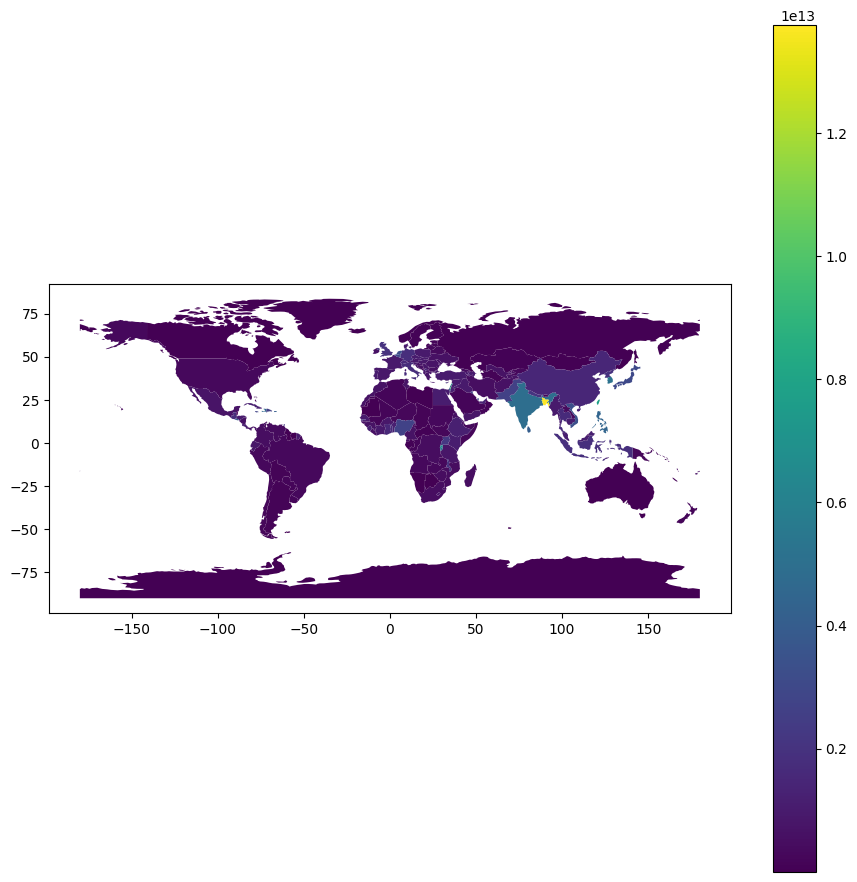

In [6]:
figsize=(11,11)
world_gdf.plot("pop_density",legend=True,figsize=figsize)

<AxesSubplot:>

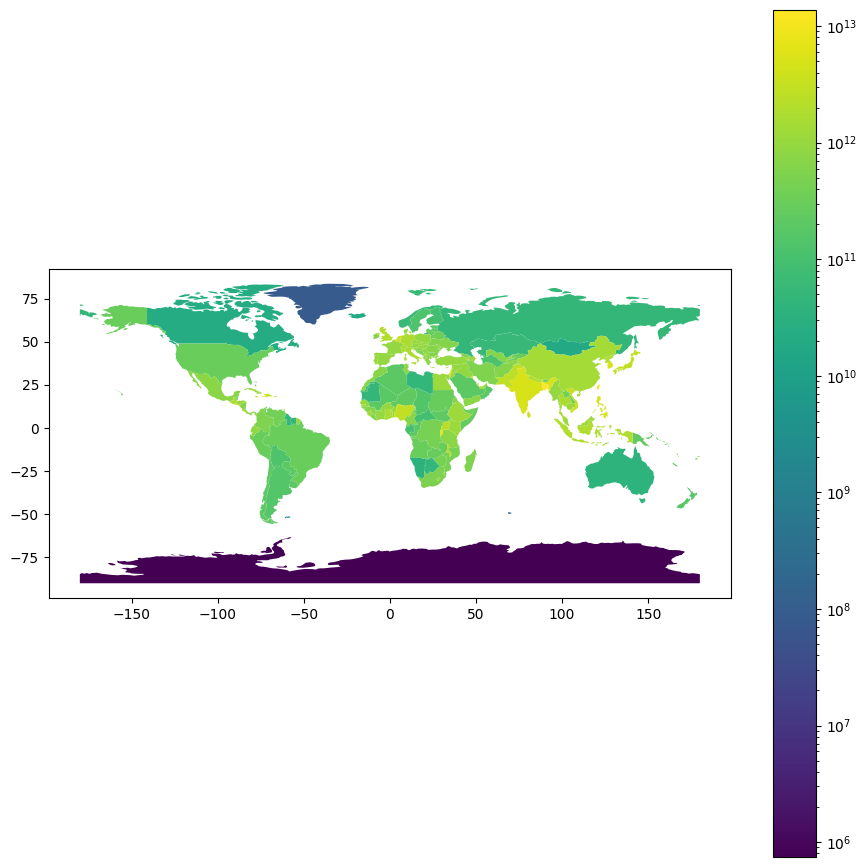

In [7]:
import matplotlib 
norm=matplotlib.colors.LogNorm(vmin=world_gdf.pop_density.min(),vmax=world_gdf.pop_density.max())
world_gdf.to_crs('epsg:4326').plot("pop_density",figsize=figsize,legend=True,norm=norm)

In [14]:
#death_df=gpd.read_file('SnowGis/Cholera_Deaths.shp')
Cholera_Deaths_df=gpd.read_file('SnowGIS/SnowGIS/Cholera_Deaths.shp')
Pumps_Death=gpd.read_file(('SnowGIS/SnowGIS/Pumps.shp'))



In [16]:
ax =Cholera_Deaths_df.plot(column="Count", alpha=0.5, edgecolor = 'k', legend=True)
Pumps_Death.plot(ax=ax, marker="x", color="red", markersize=50)

ctx.add_basemap(
    ax,
    crs=Cholera_Deaths_df.crs.to_string()
)

In [5]:
gdf_district=gpd.read_file('District\District.shp')

<AxesSubplot:>

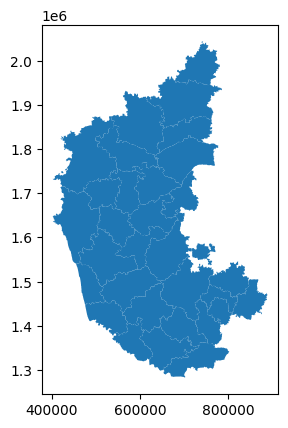

In [6]:
gdf_district.plot()